In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
overdoses = pd.read_excel("overdose_data_1999-2015.xls", sheet_name="Online",skiprows =6)

In [3]:
# function for loading data from the row we are interested in
def get_data(table, rownum, title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [4]:
# to be able to view animation directly in the notebook
%matplotlib notebook

In [5]:
title = 'Heroin Overdoses'
d = get_data(overdoses, 18, title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
overdose.columns = {title}

In [6]:
overdose.head()

,Heroin Overdoses
1999,1960.0
2000,1842.0
2001,1779.0
2002,2089.0
2003,2080.0


In [16]:
#import matplotlib.pyplot as plt
#plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
#Writer = animation.writers['ffmpeg']

import matplotlib.pyplot as plt
import matplotlib.animation as animation
Writer = animation.FFMpegWriter(fps=30, codec='libx264')

<IPython.core.display.Javascript object>


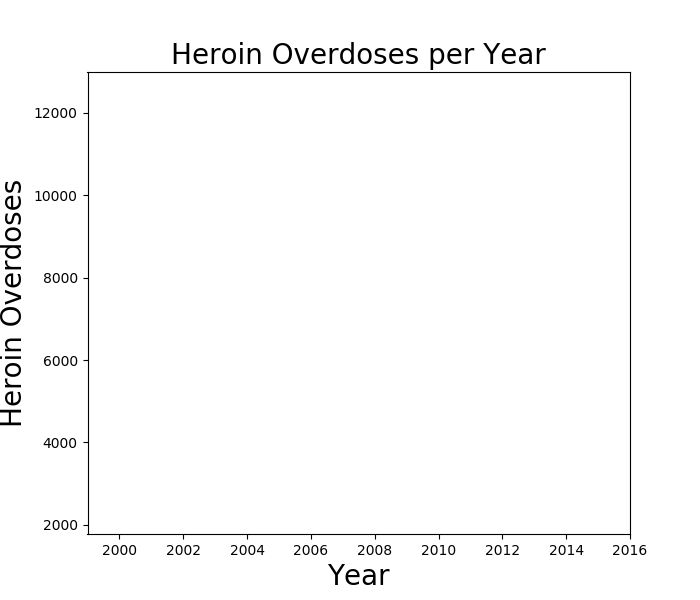

Text(0.5, 1.0, 'Heroin Overdoses per Year')

In [17]:
fig = plt.figure(figsize=(7,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

In [18]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [ ]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)